In [8]:
import numpy as np
import pandas as pd
import difflib
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [9]:
# loading the data from the csv file to apandas dataframe
movies_data = pd.read_csv('movies.csv')

# printing the first 5 rows of the dataframe
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [10]:
# number of rows and columns in the data frame
movies_data.shape

(4803, 24)

In [11]:
# selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','cast','overview','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'overview', 'director']


In [12]:
# replacing the null valuess with null string

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [13]:

# combining all the 5 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['overview']+' '+movies_data['director']



print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [14]:
vectorizer = TfidfVectorizer()



In [15]:
feature_vectors = vectorizer.fit_transform(combined_features)



print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 307355 stored elements and shape (4803, 30592)>
  Coords	Values
  (0, 561)	0.05971816344971169
  (0, 703)	0.06846420517510078
  (0, 9754)	0.08513696797398294
  (0, 23977)	0.07941905576010944
  (0, 10023)	0.07960231361105431
  (0, 6601)	0.1498786462809525
  (0, 5279)	0.1549075340655008
  (0, 10796)	0.11095111375730655
  (0, 25413)	0.24369151759694266
  (0, 29469)	0.08637114089261566
  (0, 5592)	0.17322386697661618
  (0, 25232)	0.1336739112380023
  (0, 9065)	0.14505772980982928
  (0, 27118)	0.08328687324810813
  (0, 30121)	0.07272849549697494
  (0, 19410)	0.0318696249813729
  (0, 20039)	0.37747447361884223
  (0, 23619)	0.11047375838269538
  (0, 30145)	0.18243919685121024
  (0, 30543)	0.15064979633862852
  (0, 23578)	0.16802034155542864
  (0, 24802)	0.158925784923944
  (0, 29614)	0.15064979633862852
  (0, 25868)	0.11590870590502833
  (0, 15569)	0.171366691592621
  :	:
  (4802, 9588)	0.10415492266309316
  (4802, 21386)	0.0897551

In [16]:
#creating and saving the feature vector
with open('vectorizer.pkl', 'wb') as f:
  pickle.dump(vectorizer, f)

with open('feature_vectors.pkl', 'wb') as f:
  pickle.dump(feature_vectors, f)

print("Pickel files created")

Pickel files created


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30328\2869624782.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genres', data=movies_data, order=movies_data['genres'].value_counts().index[:10], palette="viridis")


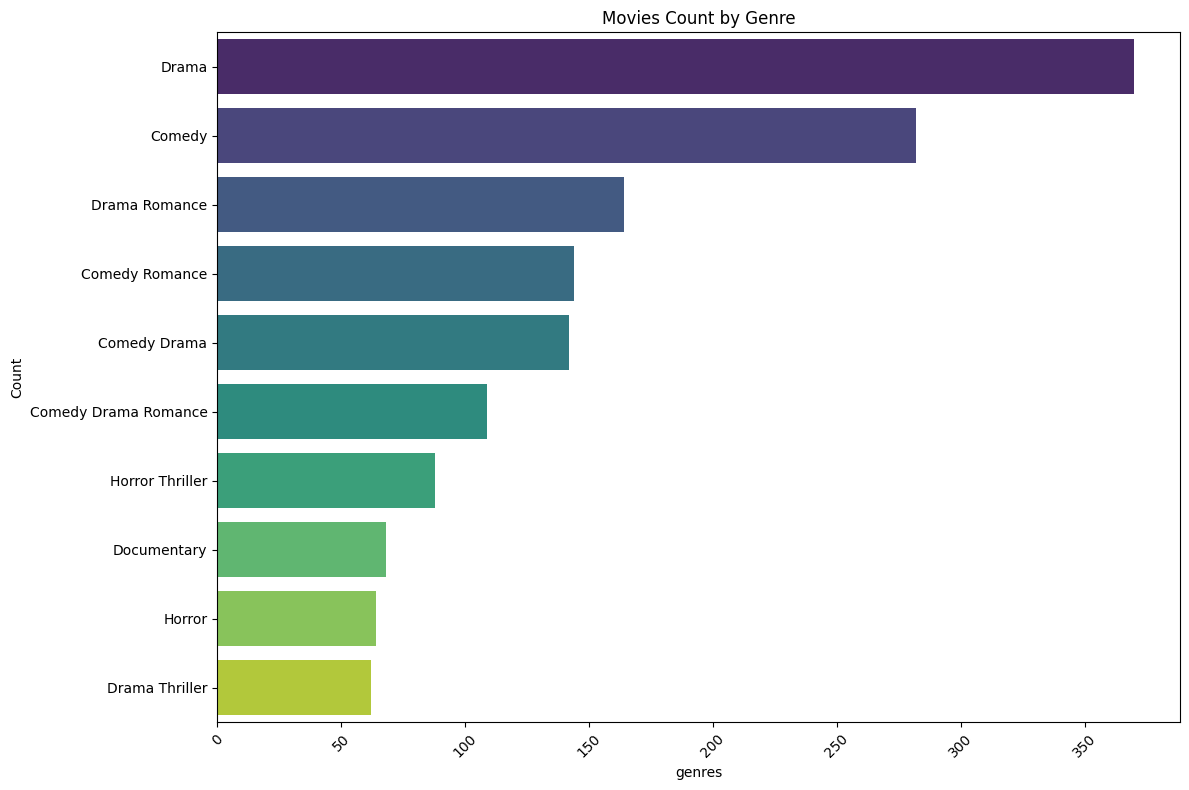

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your genre data as a pandas DataFrame
# For example: df['Genre'] with the genre counts

# Create the figure and axis
plt.figure(figsize=(12, 8))  # Increase figure size to 12x8 inches

# Plot the data (example with seaborn, you can use matplotlib as well)
sns.countplot(y='genres', data=movies_data, order=movies_data['genres'].value_counts().index[:10], palette="viridis")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)  # Rotate by 45 degrees (or 90 if needed)

# Add labels and title
plt.xlabel('genres')
plt.ylabel('Count')
plt.title('Movies Count by Genre')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()



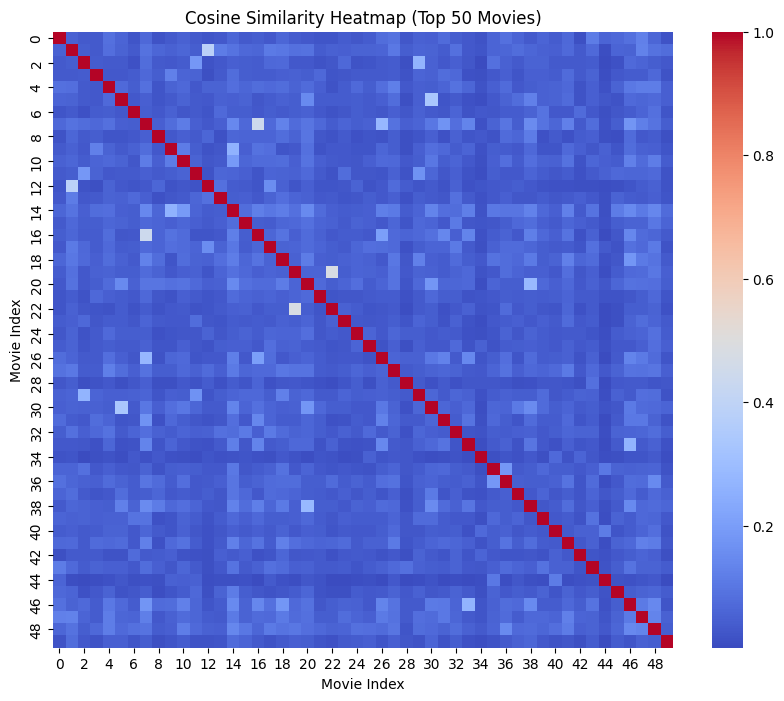

In [12]:
# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(feature_vectors)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_matrix[:50, :50], cmap='coolwarm')  # Show only 50 movies for readability
plt.title('Cosine Similarity Heatmap (Top 50 Movies)')
plt.xlabel('Movie Index')
plt.ylabel('Movie Index')
plt.show()
